In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/2022/Pragati_projects/Review_Summarization/Reviews.csv.zip
!unzip /content/drive/MyDrive/Reviews.csv.zip

Archive:  /content/drive/MyDrive/Reviews.csv.zip
  inflating: Reviews.csv             


In [ ]:
df= pd.read_csv('/content/Reviews.csv')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


# EDA

In [ ]:
df['text_length']=df['Text'].apply(len)

In [ ]:
df['Summary']= df['Summary'].astype('str')

In [ ]:
df['sum_len']=df['Summary'].apply(len)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


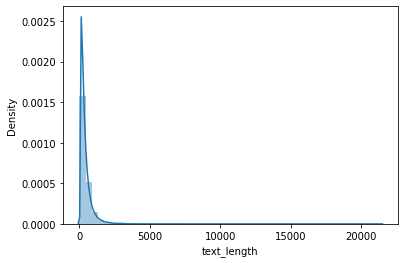

In [ ]:
#distribution graph of text length 
sns.distplot(df['text_length'],bins=50)

In [ ]:
df['text_length'].mean()

436.22208305333413

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


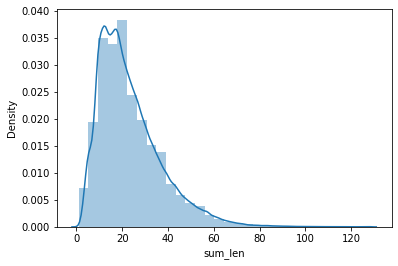

In [ ]:
#distribution grapgh of summary length
sns.distplot(df['sum_len'],bins=30)

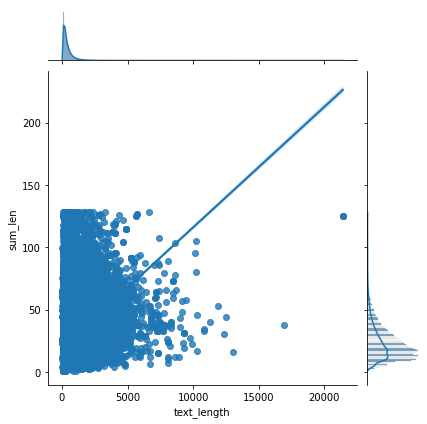

In [ ]:
#joint graph of text length vs summary length describing mean distribution of sumarry length and text length
sns.jointplot(x='text_length',y='sum_len',data=df,kind='reg')

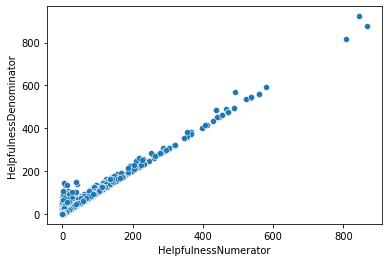

In [ ]:
#relation between HelpfulnessNumerator and HelpfulnessDenominator
sns.scatterplot(x='HelpfulnessNumerator',y='HelpfulnessDenominator',data=df)

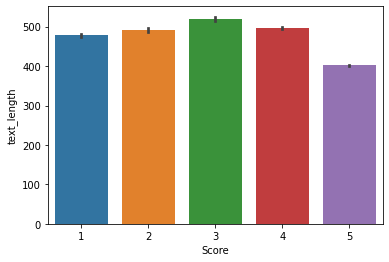

In [ ]:
#average text length for score 1 to 5
sns.barplot(x='Score',y='text_length',data=df)

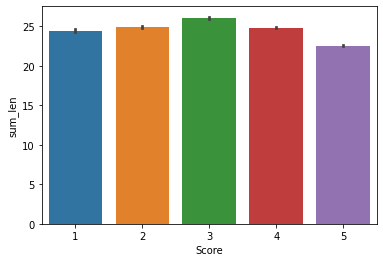

In [ ]:
#average summary length for score 1 to 5
sns.barplot(x='Score',y='sum_len',data=df)

In [ ]:
import nltk
import string
import en_core_web_sm
from wordcloud import WordCloud

In [ ]:
nlp = en_core_web_sm.load()

In [ ]:
text=df.iloc[4]['Text']
text

'Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.'

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
# stop_words

In [ ]:
#function that removes punctuations and stopwords (like I, Me, You...) from text and covert it into list of words
def remove_punc_stopword(x):
    text=x
    clean_text=[]
    text = ([token.strip(string.punctuation) for token in text.split()])
    for word in text:
        word=word.lower()
        if word not in stop_words and word!=' ':
            clean_text.append(word)
    return clean_text

In [ ]:
df['clean_text']=df['Text'].apply(remove_punc_stopword)

In [ ]:
df['clean_text']

0         [bought, several, vitality, canned, dog, food,...
1         [product, arrived, labeled, jumbo, salted, pea...
2         [confection, around, centuries, light, pillowy...
3         [looking, secret, ingredient, robitussin, beli...
4         [great, taffy, great, price, wide, assortment,...
                                ...                        
568449    [great, sesame, chicken..this, good, better, r...
568450    [i'm, disappointed, flavor, chocolate, notes, ...
568451    [stars, small, give, 10-15, one, training, ses...
568452    [best, treats, training, rewarding, dog, good,...
568453    [satisfied, product, advertised, use, cereal, ...
Name: clean_text, Length: 568454, dtype: object

In [ ]:
#finds the frequency of each word in all the reviews 
freq={}
for review in df['clean_text']:
    for word in review:
        if word in freq:
            freq[word]+=1
        else:
            freq[word]=1


In [ ]:
freq20= sorted(freq.items(), key=lambda x: x[1])[::-1][:20]
freq20=pd.DataFrame(freq20)

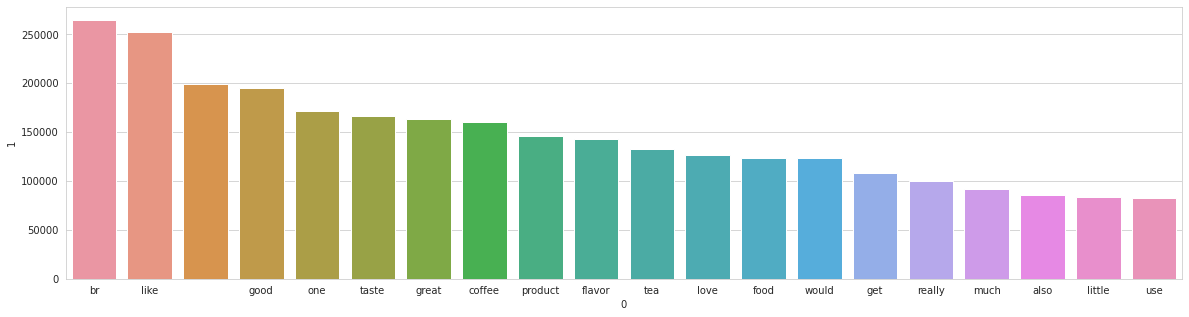

In [ ]:
#top 20 words with hightest frequency in review text
sns.set_style("whitegrid");

plt.figure(figsize=(20,5))
sns.barplot(data=freq20,x=0,y=1)

In [ ]:
df["Summary"]

0                      Good Quality Dog Food
1                          Not as Advertised
2                      "Delight" says it all
3                             Cough Medicine
4                                Great taffy
                         ...                
568449                   Will not do without
568450                          disappointed
568451              Perfect for our maltipoo
568452    Favorite Training and reward treat
568453                           Great Honey
Name: Summary, Length: 568454, dtype: object

In [ ]:
freq_sum={}
for summary in df['Summary']:
    words= summary.split()
    # print(word)
    for word in words:
        word=word.lower()
        if word in stop_words or word in string.punctuation:
            continue
        if word in freq_sum:
            freq_sum[word]+=1
        else:
            freq_sum[word]=1

In [ ]:
print(freq_sum)

{'good': 43792, 'quality': 4654, 'dog': 12488, 'food': 10223, 'advertised': 382, '"delight"': 2, 'says': 551, 'cough': 111, 'medicine': 105, 'great': 67027, 'taffy': 125, 'nice': 5484, 'great!': 2715, 'expensive': 1750, 'brands!': 14, 'wonderful,': 167, 'tasty': 8096, 'yay': 50, 'barley': 77, 'healthy': 5926, 'best': 30592, 'hot': 4180, 'sauce': 2060, 'world': 535, 'cats': 4218, 'love': 26396, '"diet"': 34, 'better': 6742, 'regular': 909, 'fans': 123, 'new': 2308, 'fresh': 1987, 'greasy!': 6, 'strawberry': 333, 'twizzlers': 32, 'yummy': 6572, 'lots': 613, 'twizzlers,': 3, 'expect.': 16, 'poor': 1297, 'taste': 13359, 'it!': 5109, 'sweet': 4525, 'candy!': 224, 'home': 661, 'delivered': 180, 'twizlers': 2, 'always': 1078, 'delicious': 11867, 'product!': 2258, 'please': 593, 'sell': 100, 'mexico!!': 3, 'nasty': 518, 'flavor': 9946, 'bargain': 288, 'price': 8020, 'yummy!': 2888, 'machine!': 30, 'taste...': 145, 'instant': 1330, 'oatmeals': 3, 'irish': 170, 'oatmeal': 1004, 'hurry!': 4, 'sat

In [ ]:
freq_sum= sorted(freq_sum.items(), key=lambda x: x[1])[::-1][:20]
# freq=pd.DataFrame(freq)

In [ ]:
freq_sum= pd.DataFrame(freq_sum)

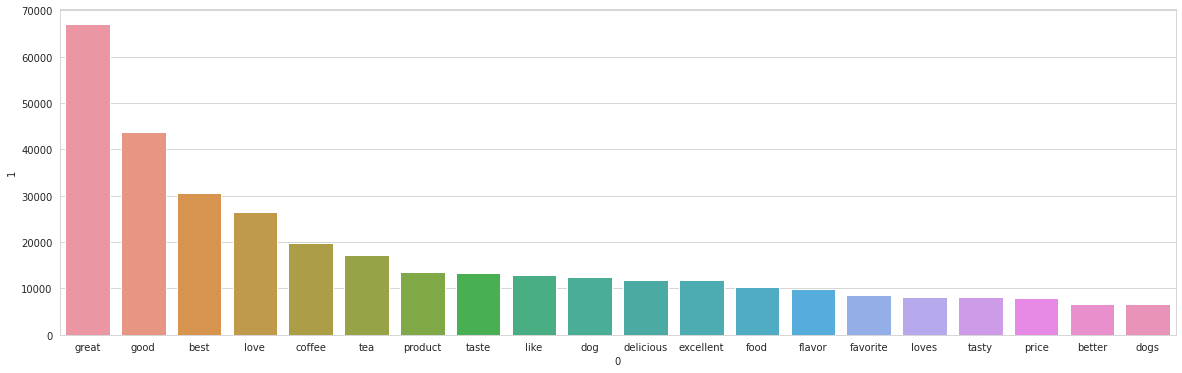

In [ ]:
#top 20 words with hightest frequency in summary text
sns.set_style("whitegrid");

plt.figure(figsize=(20,6))
sns.barplot(data=freq_sum,x=0,y=1)

# Text Summarization Models

In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
df.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time'],inplace=True,axis=1)

In [ ]:
X= df['Text']

In [ ]:
X.iloc[4]

'Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.'

In [ ]:
y= df['Summary']

In [ ]:
y.iloc[4]

'Great taffy'

## Frequency Summarization

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
def frequency_summarization(text):
  sentences = sent_tokenize(text)
  sentenceValue = {}
  summary = ''
  max=0
  for sentence in sentences:
    sentence= sentence.lower()
    words= sentence.split()
    sentenceValue[sentence]=0
    for word in words:
      if word in freq:
        sentenceValue[sentence] += freq[word]
    # if sentence in sentenceValue and sentenceValue[sentence]>max:
    #   summary=sentence
    sumValues = 0
  for sentence in sentenceValue:
    sumValues += sentenceValue[sentence]
  average = int(sumValues / len(sentenceValue))
  # print(average)
  summary = ''
  for sentence in sentenceValue:
    # print(sentence)
    if (sentenceValue[sentence] > (1*average)):
      summary += "" + sentence
  if summary=='':
    summary=text
  return summary

In [ ]:
df['Text'].iloc[4]

'Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.'

In [ ]:
# freq

In [ ]:
frequency_summarization(df['Text'].iloc[4])

'great taffy at a great price.'

In [ ]:
All_Summary_Frequency= df['Text'].apply(frequency_summarization)


In [ ]:
y_pred = All_Summary_Frequency.apply(remove_punc_stopword)

In [ ]:
y_pred = y_pred.apply(lambda x: (' ').join(x))

In [ ]:
y_pred.iloc[199]

'much effective buying one grocery store 7-11 every time want mint'

In [ ]:
y.iloc[199]

'these mints are awesome!'

In [ ]:
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rouge import Rouge
ROUGE = Rouge()

In [ ]:
len_y= y.apply(len)

In [ ]:
sum(len_y==0)

0

In [ ]:
y_pred.apply(type)

0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
              ...      
568449    <class 'str'>
568450    <class 'str'>
568451    <class 'str'>
568452    <class 'str'>
568453    <class 'str'>
Name: Text, Length: 568454, dtype: object

In [ ]:
y= y.apply(lambda x: x.lower())

In [ ]:
precision=0
recall=0
for i in range(len(y)):
  # print(i)
  try:
      score=ROUGE.get_scores(y_pred.iloc[i], y.iloc[i])
  # print(score[0])
      precision+= score[0]['rouge-1']['p']
      recall+= score[0]['rouge-1']['r']
  except:
    None
precision/=len(y)
recall/=len(y)

In [ ]:
print(precision)
print(recall)

0.0519715900035544
0.2075728162706759


## BART Model

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.4 MB/s 
     |████████████████████████████████| 7.6 MB 51.0 MB/s 
     |████████████████████████████████| 182 kB 53.1 MB/s 


In [ ]:
df_= df.head(100)

In [ ]:
from transformers import pipeline

In [ ]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

In [ ]:
text= df['Text'].iloc[4]
text

'Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.'

In [ ]:
df['Summary'].iloc[4]

'Great taffy'

In [ ]:
def bart_summarization(text):
  # print('a'),
  # print(i)
  # i+=1
  if len(text)>1000:
    text=text[:1000]
  Max_len=int(len(text)/20)
  Max_len= min(Max_len,130)
  try:
    summary=summarizer(text,max_length=Max_len, min_length=1, do_sample=False)
    summary= summary[0]['summary_text']
  except:
    summary=text
  return summary

In [ ]:
bart_summarization(text)

'Great taffy'

In [ ]:
Bart_summary= df_['Text'].apply(bart_summarization)

In [ ]:
Bart_summary.head()

0    The product looks more like a stew than a proc...
1                     Product arrived labeled as Jumbo
2    Filberts is a light, pillowy citrus gelatin wi...
3                     The flavor is very medicinal. If
4                                          Great taffy
Name: Text, dtype: object

In [ ]:
precision=0
recall=0
for i in range(0,100):
  # print(i)
  try:
      score=ROUGE.get_scores(Bart_summary[i], df_['Summary'].iloc[i])
  
      precision+= score[0]['rouge-1']['p']
      recall+= score[0]['rouge-1']['r']
      # print(precision)
  except:
    print(i)


In [ ]:
precision/len(df_)

0.06696681551019786

In [ ]:
recall/len(df_)

0.11263492063492063

## Peagsus Model for text summarization

In [ ]:
! pip install transformers
! pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
import torch



model_name = 'google/pegasus-xsum'

device = "cuda" if torch.cuda.is_available() else "cpu"
type(model_name)
tokenizer = PegasusTokenizer.from_pretrained(model_name)


In [ ]:
device

'cpu'

In [ ]:
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(device)

In [ ]:
model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")
tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")

In [ ]:
# df_=df_.head()

In [ ]:
# batch = tokenizer(text, truncation=True, padding="longest", return_tensors="pt").to(device)
# translated = model.generate(**batch)
# tgt_text1 = tokenizer.batch_decode(translated, skip_special_tokens=True)

In [ ]:
tgt_text=[]
for i in range(0,5):
    print(i)
    text= df['Text'].iloc[i]
    text=[text]
    batch = tokenizer(text, truncation=True, padding="longest", return_tensors="pt").to(device)
    translated = model.generate(**batch)
    # print(translated)
    summary = tokenizer.batch_decode(translated, skip_special_tokens=True)
    tgt_text.append(summary)

0


/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 64 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


1
2
3
4


In [ ]:
print(len(tgt_text))

5


In [ ]:
df['Text'].iloc[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [ ]:
y= df['Summary'].tolist()

In [ ]:
tgt_text[1]

['I was sent a box of Jumbo Salted Peanuts and they were not the size I was expecting.']

In [ ]:
precision=0
recall=0
for i in range(0,5):
  # print(i)
#   try:
    #   print(tgt_text[i])
    #   print( df['Summary'].iloc[i])
      score=ROUGE.get_scores(tgt_text[i][0], y[i])
  
      precision+= score[0]['rouge-1']['p']
      recall+= score[0]['rouge-1']['r']
      # print(precision)
#   except:
#     print(i)


In [ ]:
print(precision)

0.3333333333333333


In [ ]:
print(recall)

1.0


## LSTM Model

In [ ]:
!pip install tensorflow==2.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 489.6 MB 26 kB/s 
     |████████████████████████████████| 1.3 MB 51.4 MB/s 
     |████████████████████████████████| 463 kB 72.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2


In [ ]:
!pip install pad-sequences


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pad-sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10216 sha256=f60aeed673816d4993044cb72287794299855e9b9d5c49f45bbf3e2b34e935ea
  Stored in directory: /root/.cache/pip/wheels/51/e4/5c/d3610ed4476515e540ff4096e3e9a8a3e701dedfe1072eb000
Successfully built pad-sequences


In [ ]:
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional, Attention
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [ ]:
import re

In [ ]:
df.drop_duplicates(subset=['Text'],inplace=True)  #dropping duplicates
df.dropna(axis=0,inplace=True) 

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df= df.head(100000)

In [ ]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in df['Text']:
    cleaned_text.append(text_cleaner(t))


In [ ]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

#Call the above function
cleaned_summary = []
for t in df['Summary']:
    cleaned_summary.append(summary_cleaner(t))

df['cleaned_text']=cleaned_text
df['cleaned_summary']=cleaned_summary
df['cleaned_summary'].replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)


In [ ]:
# df['cleaned_summary'] = df['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [ ]:
max_len_text=100
max_len_summary=10

In [ ]:
df['cleaned_text'].apply(type).value_counts()

<class 'str'>    99920
Name: cleaned_text, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df['cleaned_text'],df['cleaned_summary'],test_size=0.1,random_state=0,shuffle=True)

In [ ]:
from keras_preprocessing.sequence import pad_sequences

In [ ]:
x_train= x_train.tolist()
x_test= x_test.tolist()

In [ ]:
type(x_train[0][0])

str

In [ ]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(x_train)

x_train    =   x_tokenizer.texts_to_sequences(x_train) 
x_test   =   x_tokenizer.texts_to_sequences(x_test)

x_train    =   pad_sequences(x_train,  maxlen=max_len_text, padding='post') 
x_test   =   pad_sequences(x_test, maxlen=max_len_text, padding='post')

x_vocab_len   =  len(x_tokenizer.word_index) +1

In [ ]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

#convert summary sequences into integer sequences
y_train    =   y_tokenizer.texts_to_sequences(y_train) 
y_test   =   y_tokenizer.texts_to_sequences(y_test) 

#padding zero upto maximum length
y_train    =   pad_sequences(y_train, maxlen=max_len_summary, padding='post')
y_test   =   pad_sequences(y_test, maxlen=max_len_summary, padding='post')

y_vocab_len  =   len(y_tokenizer.word_index) +1

In [ ]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

logger = tf.get_logger()

class AttentionLayer(tf.keras.layers.Layer):
   
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs

        logger.debug(f"encoder_out_seq.shape = {encoder_out_seq.shape}")
        logger.debug(f"decoder_out_seq.shape = {decoder_out_seq.shape}")

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            logger.debug("Running energy computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_full_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim

            logger.debug(f"U_a_dot_h.shape = {U_a_dot_h.shape}")

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)

            logger.debug(f"Ws_plus_Uh.shape = {Ws_plus_Uh.shape}")

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            logger.debug(f"ei.shape = {e_i.shape}")

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            logger.debug("Running attention vector computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_full_seq * K.expand_dims(inputs, -1), axis=1)

            logger.debug(f"ci.shape = {c_i.shape}")

            return c_i, [c_i]

        # we don't maintain states between steps when computing attention
        # attention is stateless, so we're passing a fake state for RNN step function
        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e], constants=[encoder_out_seq]
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c], constants=[encoder_out_seq]
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:
from keras import backend as K 
K.clear_session() 
latent_dim = 500 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_vocab_len, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_outputs, state_h2, state_c2 = encoder_lstm2(encoder_output1) 


decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_vocab_len, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 


decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h2, state_c2]) 


attn_layer = AttentionLayer() 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])


decoder_dense = TimeDistributed(Dense(y_vocab_len, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 500)     27526500    ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 100, 500),   2002000     ['embedding[0][0]']              
                                 (None, 500),                                                 

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [ ]:
history=model.fit([x_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=10,batch_size=512)

Epoch 1/50
 69/176 [==========>...................] - ETA: 1:31:36 - loss: 3.0613

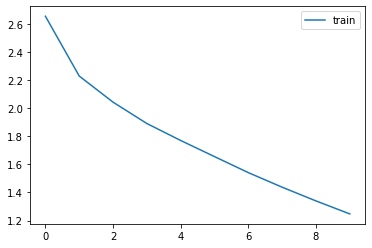

In [ ]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.legend() 
pyplot.show()

In [ ]:
y_token_index_word=y_tokenizer.index_word 
x_token_index_word=x_tokenizer.index_word
y_word_index=y_tokenizer.word_index

In [ ]:

encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h2, state_c2])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    encoder_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = y_word_index['start']
    i=0
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition and i<15:
        output_tokens, h, c = decoder_model.predict([target_seq] + [encoder_out, e_h, e_c])

        # Sample a token
        # print(output_tokens[0, -1, 1:])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = y_token_index_word[sampled_token_index]

        i+=1
        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence


In [ ]:
def sequence_summarry(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=y_word_index['start']) and i!=y_word_index['end']):
        newString=newString+y_token_index_word[i]+' '
    return newString

def sequence_text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+x_token_index_word[i]+' '
    return newString


In [ ]:
for i in range(0,100):
    print("Review:",sequence_text(x_train[i]))
    print("Original summary:",sequence_summarry(y_train[i]))
    print("Predicted summary:",decode_sequence(x_train[i].reshape(1,max_len_text)))
    print("\n")

In [ ]:
precision=0
recall=0
for i in range(0,100):
  # print(i)
  try:
      pred=decode_sequence(x_tr[i].reshape(1,max_len_text))
      score=ROUGE.get_scores(pred, sequence_summarry(y_tr[i]))
  
      precision+= score[0]['rouge-1']['p']
      recall+= score[0]['rouge-1']['r']
      # print(precision)
  except:
    print(i)

In [ ]:
print(precision)

In [ ]:
print(recall)